In [1]:
#Importing library python yang umum digunakan untuk Machine Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Membaca file csv train
df_train = pd.read_csv('D:\Dataset\HCI_Final_Project/application_train.csv')

In [3]:
#Pastikan data yang di "load" merupaakan data yang benar
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.shape

(307511, 122)

In [5]:
#drop kolom SK_ID_CURR karena tidak diperlukan dalam analisis & pemodelan
df_train = df_train.drop('SK_ID_CURR', axis=1)
df_train.shape

(307511, 121)

In [6]:
"""
Tujuan:

TARGET : (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y- 
        installments of the loan in our sample, 0 - all other cases)
"""

'\nTujuan:\n\nTARGET : (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y- \n        installments of the loan in our sample, 0 - all other cases)\n'

In [7]:
#Membaca file csv test
df_test = pd.read_csv('D:\Dataset\HCI_Final_Project/application_test.csv')

In [8]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_test.shape

(48744, 121)

In [10]:
#drop kolom SK_ID_CURR karena tidak diperlukan dalam analisis & pemodelan
df_test = df_test.drop('SK_ID_CURR', axis=1)
df_test.shape

(48744, 120)

In [11]:
"""
EXPLORATORY DATA ANALYSIS
"""

'\nEXPLORATORY DATA ANALYSIS\n'

In [12]:
#Mencari tahu value kategorikal dalam variabel TARGET
df_train.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [13]:
"""
1 : Bad
0 : Good
"""

'\n1 : Bad\n0 : Good\n'

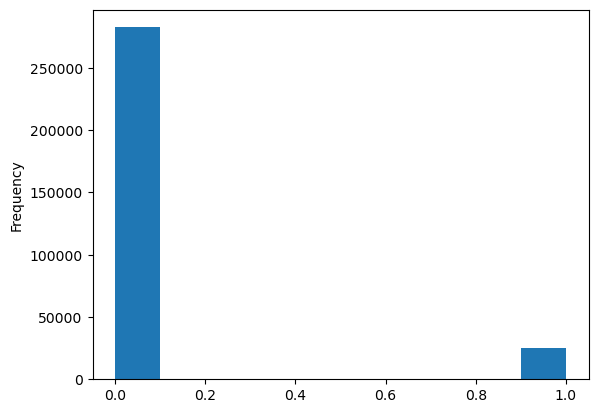

In [14]:
#Melihat perbedaan secara histogram
df_train['TARGET'].astype('int').plot.hist()
plt.show()

In [15]:
#Terlihat dari plot histogram bahwa jumlah application yang diterima (0) jauh lebih banyak dari application yang ditolak(1)
#Sehingga terjadi distribusi yang Unbalance

In [16]:
#check missing value
print(100*df_train.isna().sum()/len(df_train))
print(df_train.isna().sum().shape)

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 121, dtype: float64
(121,)


In [17]:
#Karena memeriksa hanya dengan cara di atas tidak mengungkap berapa banyak kolom yang memiliki nilai hilang karena besarnya-
#jumlah data dan kolom
#Oleh karena itu akan dibuat fungsi yang dapat melakukan pengecekan data yang hilang
def miss_val_check(df):
    miss_val = df.isna().sum()
    
    #Persentasi jumlah missing values dari total keseluruhan values per atribute
    miss_val_percent = 100*miss_val/len(df)
    
    #Menjadikan mis_val dan mis_val_pct sebagai kolom
    miss_val_conc = pd.concat([miss_val, miss_val_percent], axis=1)
    
    #Mengubah nama mis_val dan mis_val_pct menjadi 'Missing values' & '% of total values'
    miss_val_naming = miss_val_conc.rename(
        columns={
            0:'Missing Values',
            1:'% of Total Values'
        }
    )
    
    #sorting values apabila pada kolom 1 mis_val_assgn_col bukan 0
    miss_val_naming = miss_val_naming[miss_val_naming.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    count_specific_value = (miss_val_naming[miss_val_naming.iloc[:,0] != 1]).value_counts().sum()
    
    #print kesimpulan missing values
    print(f'Total columns : {str(df.shape[1])}\n Missing columns : {str(miss_val_naming.shape[0])}\n')
    return miss_val_naming

In [18]:
#Memanggil fungsi
missing_values = miss_val_check(df_train)
missing_values.head(20)

Total columns : 121
 Missing columns : 67



,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


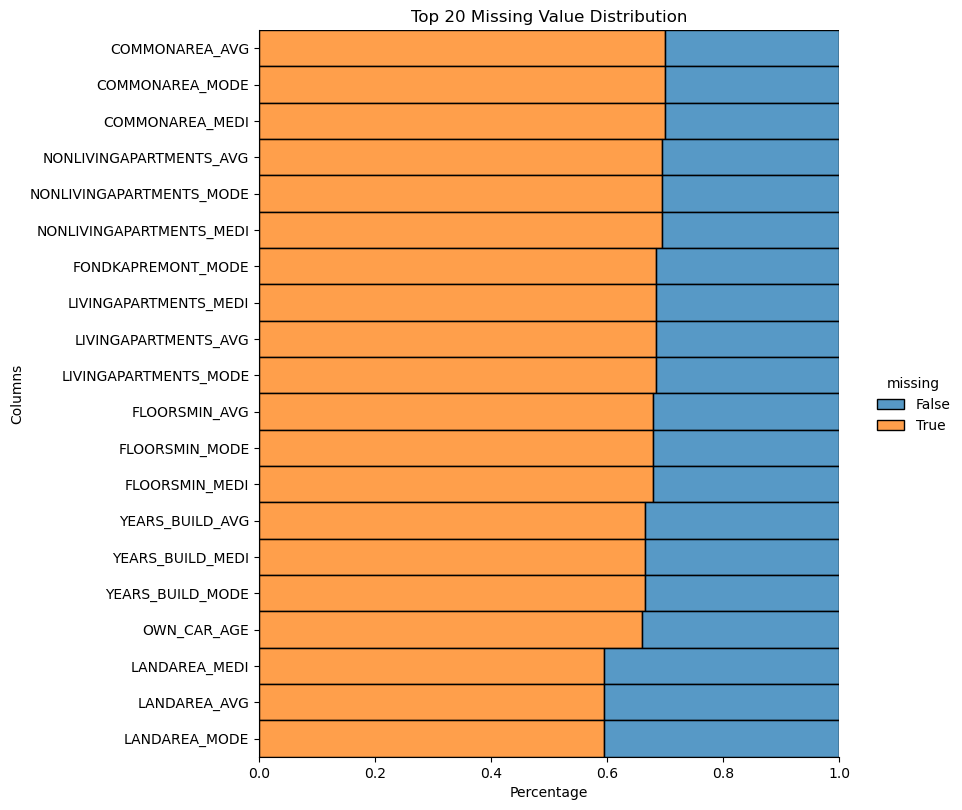

In [19]:
#Mengatur missing values
missing_proportion = df_train.isnull().mean().sort_values(ascending=False)

#Mengambil 20 variable dengan missing values terbanyak
top_20_missing = missing_proportion.head(20)

#Membuat dataframe hanya untuk 20 variable teratas
df_top_20_missing = df_train[top_20_missing.index]

#Membuat the displot untuk 20 variable teratas
sns.displot(
    data=df_top_20_missing.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

#Mengatur visual & axis
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.title('Top 20 Missing Value Distribution')

plt.show()

In [20]:
#Check memastikan dataset memiliki data types numerikal
df_train.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

In [21]:
#Ditemukan bahwa masih terdapat tipe data yang berupa object
#Perlu dilakukan pengubahan untuk tipe data object ke bentuk numerik, sehingga akan diterapkan encoder
#encoder yang digunakan bergantung kepada seberapa banyak data yang "unique" dalam kolom tersebut

df_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

#print(df_train[2].dtypes)
#print(len(df_train['EMERGENCYSTATE_MODE'].unique()))

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [22]:
"""
Didapatkan bahwa adanya variable yang memiliki dtypes object, sehingga perlu diterapkan encoding untuk menyesuaikan dengan-
dtypes variable lainnya
"""

'\nDidapatkan bahwa adanya variable yang memiliki dtypes object, sehingga perlu diterapkan encoding untuk menyesuaikan dengan-\ndtypes variable lainnya\n'

In [23]:
#labelencoder digunakan hanya untuk variable dtypes object dengan 2 kategori
encd = LabelEncoder()
unq_counter = 0

#print(len(df_train['TARGET'].unique()))
for col in df_train:
    if df_train[col].dtypes == 'object':
        if len(df_train[col].unique()) <= 2:
            encd.fit(df_train[col])
            df_train[col] = encd.transform(df_train[col])
            df_test[col] = encd.transform(df_test[col])

            unq_counter +=1
    
print(str(unq_counter)+' kolom di encode')

3 kolom di encode


In [24]:
#Melakukan one-hot encoding
#one-hot encoding digunakan hanya untuk variable dtypes object >2 kategori
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training data OHC shape: '+ str(df_train.shape))
print('test data OHC shape: '+ str(df_test.shape))

Training data OHC shape: (307511, 242)
test data OHC shape: (48744, 238)


In [25]:
"""
Check anomali
"""

'\nCheck anomali\n'

In [26]:
#Cek anomali pada dtypes variable (object, str, dll)
for col in df_train:
    print(col, df_train[col].dtype)

TARGET int64
NAME_CONTRACT_TYPE int32
FLAG_OWN_CAR int32
FLAG_OWN_REALTY int32
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
EXT_SOURCE_1 float64
EXT_SOURCE_2 float64
EXT_SOURCE_3 float64
APARTMENTS_AVG float64
BASEMENTAREA_AVG float64
YEARS_BEGINEXPLUATATION_AVG float64
YEARS_BUILD_AVG float64
COMMONAREA_AVG float64
ELEVATORS_AVG float64
ENTRANCES_AVG float64
FLOORSMAX_AVG fl

In [27]:
#Variable terdekat terkait yang mungkin memiliki hubungan dengan client
(df_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [28]:
#Variable terdekat lain terkait yang mungkin memiliki hubungan dengan client
df_train.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [29]:
"""
Didapatkan outlier pada variable DAYS_EMPLOYED yaitu hari sebanyak 365243 atau >1000 tahun,
yang mana tidak masuk akal
"""

'\nDidapatkan outlier pada variable DAYS_EMPLOYED yaitu hari sebanyak 365243 atau >1000 tahun,\nyang mana tidak masuk akal\n'

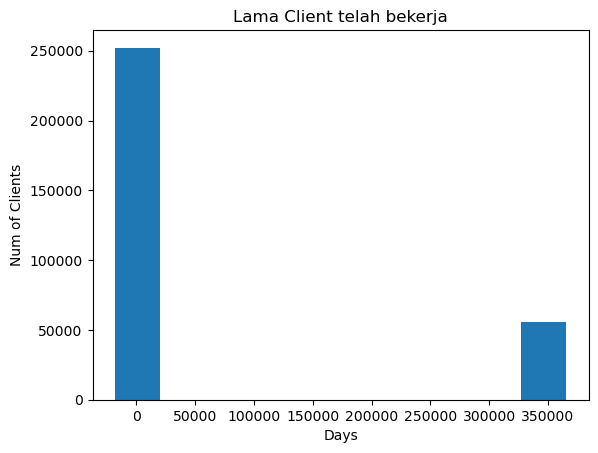

In [30]:
#Membuat histogram
df_train['DAYS_EMPLOYED'].astype('float64').plot.hist()

plt.title('Lama Client telah bekerja')
plt.xlabel('Days')
plt.ylabel('Num of Clients')
plt.grid(False)
plt.show()
#print(df_train[df_train['DAYS_EMPLOYED'] == 365243])

In [31]:
#Cek row yang memiliki value anomali=365243 (max)
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]

#Cek row yang bukan anomali
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]

print('Nilai "Bukan anomali" gagal membayar %0.2F%% of loans' %  (anom['TARGET'].mean() * 100))
print('Nilai "Anomali" gagal membayar %0.2F%% of loans' %  (non_anom['TARGET'].mean() * 100))
print('Total anomali %d dalam DAYS_EMPLOYED column' % len(anom))

Nilai "Bukan anomali" gagal membayar 5.40% of loans
Nilai "Anomali" gagal membayar 8.66% of loans
Total anomali 55374 dalam DAYS_EMPLOYED column


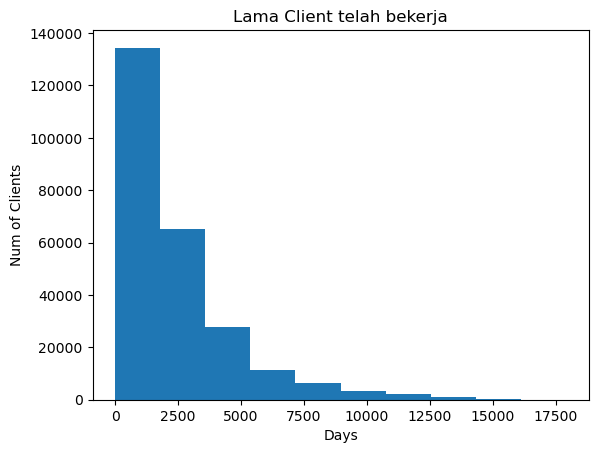

In [32]:
#Cek row yang memiliki value anomali=365243 (max)
df_train['DAYS_EMPLOYED_ANOMALOUS'] = df_train['DAYS_EMPLOYED'] == 365243

#Mengubah seluruh row dengan value 365243 menjadi missing values
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].abs()

#Membuat histogram
df_train['DAYS_EMPLOYED'].plot.hist()
plt.title('Lama Client telah bekerja')
plt.xlabel('Days')
plt.ylabel('Num of Clients')
plt.grid(False)
plt.show()

In [33]:
#menerapkan kembali checking row yang memiliki value anomali=365243 (max) pada df_test
df_test['DAYS_EMPLOYED_ANOMALOUS'] = df_test['DAYS_EMPLOYED'] == 365243

#Mengubah seluruh row dengan value 365243 menjadi missing values
df_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies from the total %d of values' % (df_test['DAYS_EMPLOYED_ANOMALOUS'].sum(), len(df_test)))

There are 9274 anomalies from the total 48744 of values


In [34]:
#Persentase anomali terhadap keseluruhan
anom_percentage =( df_test['DAYS_EMPLOYED_ANOMALOUS'].sum()/len(df_test) * 100)
print(anom_percentage)

19.02593139668472


In [35]:
#Melihat korelasi seluruh Variables terhadap TARGET
correlation = df_train.corr()['TARGET'].sort_values()
print(correlation.head(15))
print(correlation.tail(15))

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_EMPLOYED                          -0.074958
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED_ANOMALOUS                -0.045987
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
Name: TARGET, dtype: float64
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                            

In [36]:
#Mengambil nilai absolut variable DAYS_BIRTH
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])

#Melihat korelasi variable DAYS_BIRTH terhadap TARGET
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830984513

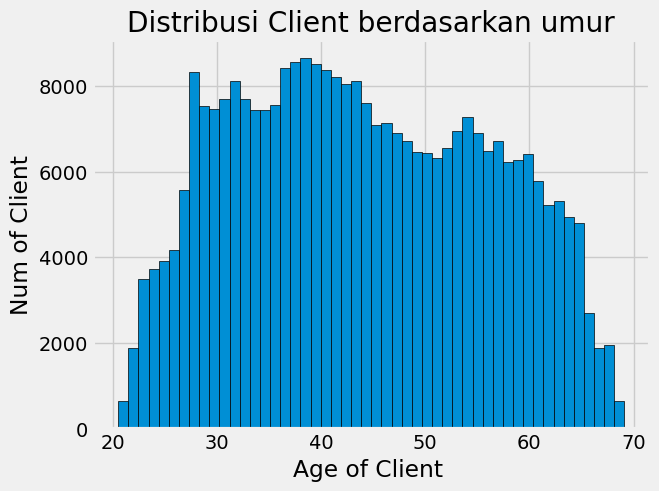

In [37]:
#Mengatur style histogram
plt.style.use('fivethirtyeight')

#mengatur nama label & title & visual
plt.hist(df_train['DAYS_BIRTH']/365, edgecolor='k', bins=50)
plt.xlabel('Age of Client ')
plt.ylabel('Num of Client')
plt.title('Distribusi Client berdasarkan umur')
plt.show()

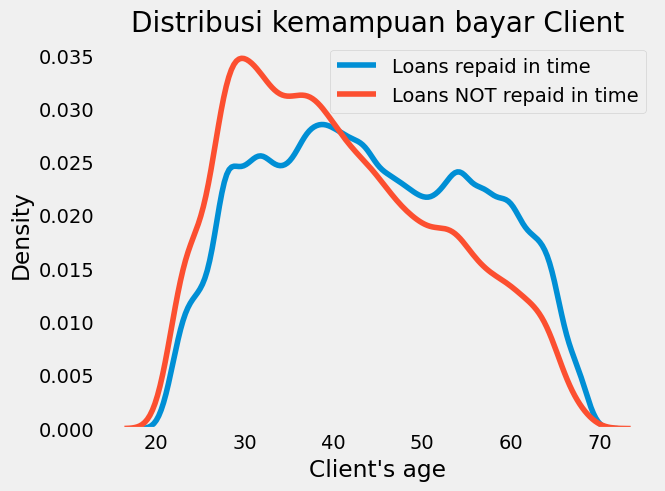

In [38]:
#Membuat plot kde
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='Loans repaid in time')
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='Loans NOT repaid in time')

#mengatur nama label & title
plt.xlabel("Client's age")
plt.title('Distribusi kemampuan bayar Client')
plt.grid(False)
plt.legend()
plt.show()

In [39]:
#Membuat bar chart pengaruh usia
cl_age = df_train[['TARGET', 'DAYS_BIRTH']]

cl_age['CLIENTS_AGE'] = cl_age['DAYS_BIRTH'] / 365

cl_age['Age_range'] = pd.cut(cl_age['CLIENTS_AGE'], bins=np.linspace(20, 70, num=11))

cl_age.head()

,TARGET,DAYS_BIRTH,CLIENTS_AGE,Age_range
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [40]:
cl_age_grp = cl_age.groupby('Age_range').mean()
cl_age_grp

,TARGET,DAYS_BIRTH,CLIENTS_AGE
Age_range,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


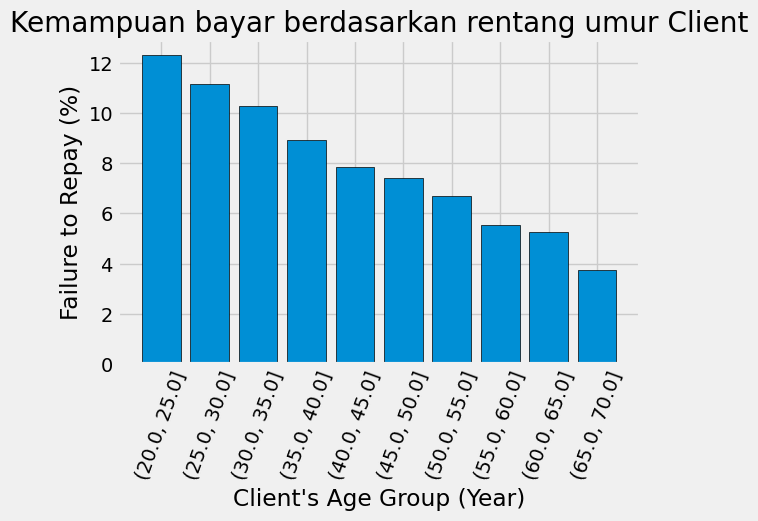

In [41]:
plt.figure(figsize=(6,4))
plt.bar(cl_age_grp.index.astype(str), 100 * cl_age_grp['TARGET'],  edgecolor='k')

#mengatur nama label & title & visual
plt.xticks(rotation = 70)
plt.xlabel("Client's Age Group (Year)")
plt.ylabel('Failure to Repay (%)')
plt.title("Kemampuan bayar berdasarkan rentang umur Client")
plt.show()

In [42]:
"""
Didapatkan bahwa 12% dari total client yang gagal membayar pinjaman berada pada rentang umur 20 s/d 25 tahun, sedangkan client yang-
berkemungkinan untuk dapat membayar pinjaman merupakan minoritas client yang berada pada rentang umur 65-70 tahun
yaitu merupakan 3% dari total client.
"""

'\nDidapatkan bahwa 12% dari total client yang gagal membayar pinjaman berada pada rentang umur 20 s/d 25 tahun, sedangkan client yang-\nberkemungkinan untuk dapat membayar pinjaman merupakan minoritas client yang berada pada rentang umur 65-70 tahun\nyaitu merupakan 3% dari total client.\n'

In [43]:
#Membuat bar chart pengaruh lama bekerja
cl_emp = df_train[['TARGET', 'DAYS_EMPLOYED']]

#Membuat kolom baru dan assign value
cl_emp['Employ_range'] = pd.cut(cl_emp['DAYS_EMPLOYED'], bins=np.linspace(365, 4020, num=11))

cl_emp.head()

,TARGET,DAYS_EMPLOYED,Employ_range
0,1,637.0,"(365.0, 730.5]"
1,0,1188.0,"(1096.0, 1461.5]"
2,0,225.0,NaN
3,0,3039.0,"(2923.5, 3289.0]"
4,0,3038.0,"(2923.5, 3289.0]"


In [44]:
cl_emp_grp = cl_emp.groupby('Employ_range').mean()

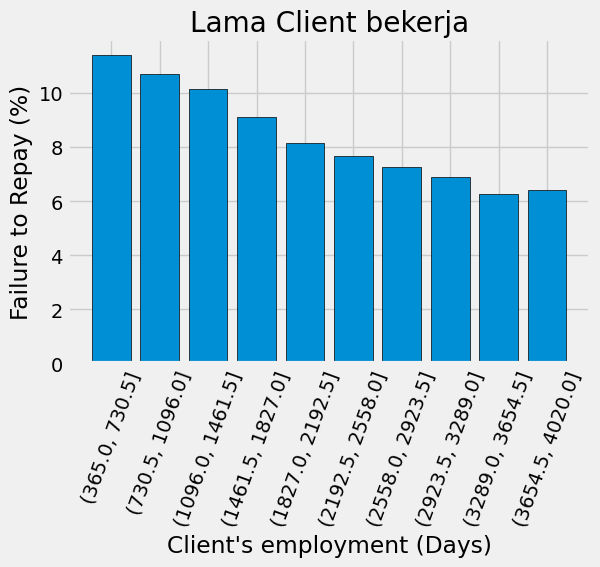

In [45]:
plt.figure(figsize=(6,4))
plt.bar(cl_emp_grp.index.astype(str), 100 * cl_emp_grp['TARGET'],  edgecolor='k')

#mengatur nama label & title & visual
plt.xticks(rotation = 70)
plt.xlabel("Client's employment (Days)")
plt.ylabel('Failure to Repay (%)')
plt.title("Lama Client bekerja")
#plt.yticks(np.arange(0, cl_age_grp['DAYS_EMPLOYED'].max() + 500, 500))
plt.show()

In [46]:
"""
Didapatkan bahwa rata-rata dari client yang berada pada rentang umur 20 s/d 25 memiliki lama bekerja selama 2 tahun, sedangkan-
client yang berada pada rentang umur 65 s/d 70 rata-rata telah bekerja selama >12 tahun. Hal ini dapat dapat menjadi alasan-
mengapa client pada rentang 20 s/d 25 tahun lebih banyak gagal membayar pinjaman dibanding client rentang umur 65 s/d 70.
"""

'\nDidapatkan bahwa rata-rata dari client yang berada pada rentang umur 20 s/d 25 memiliki lama bekerja selama 2 tahun, sedangkan-\nclient yang berada pada rentang umur 65 s/d 70 rata-rata telah bekerja selama >12 tahun. Hal ini dapat dapat menjadi alasan-\nmengapa client pada rentang 20 s/d 25 tahun lebih banyak gagal membayar pinjaman dibanding client rentang umur 65 s/d 70.\n'

In [47]:
#Membuat bar chart pengaruh penghasilan
cl_inc = df_train[['TARGET', 'AMT_INCOME_TOTAL']]

#Membuat kolom baru dan assign value
cl_inc['CLIENTS_INCOME'] = cl_inc['AMT_INCOME_TOTAL']
cl_inc['Inc_range'] = pd.cut(cl_inc['CLIENTS_INCOME'], bins=np.linspace(50000, 300000, num=11))

cl_inc.head()

,TARGET,AMT_INCOME_TOTAL,CLIENTS_INCOME,Inc_range
0,1,202500.0,202500.0,"(200000.0, 225000.0]"
1,0,270000.0,270000.0,"(250000.0, 275000.0]"
2,0,67500.0,67500.0,"(50000.0, 75000.0]"
3,0,135000.0,135000.0,"(125000.0, 150000.0]"
4,0,121500.0,121500.0,"(100000.0, 125000.0]"


In [48]:
cl_inc_grp = cl_inc.groupby('Inc_range').mean()
cl_inc_grp

,TARGET,AMT_INCOME_TOTAL,CLIENTS_INCOME
Inc_range,,,
"(50000.0, 75000.0]",0.078761,65224.720693,65224.720693
"(75000.0, 100000.0]",0.084309,88306.472831,88306.472831
"(100000.0, 125000.0]",0.087893,112647.721528,112647.721528
"(125000.0, 150000.0]",0.084631,135118.070310,135118.070310
"(150000.0, 175000.0]",0.085913,159262.668422,159262.668422
"(175000.0, 200000.0]",0.082782,181298.054515,181298.054515
"(200000.0, 225000.0]",0.078486,214913.983876,214913.983876
"(225000.0, 250000.0]",0.071662,244535.646678,244535.646678
"(250000.0, 275000.0]",0.069662,268246.321232,268246.321232


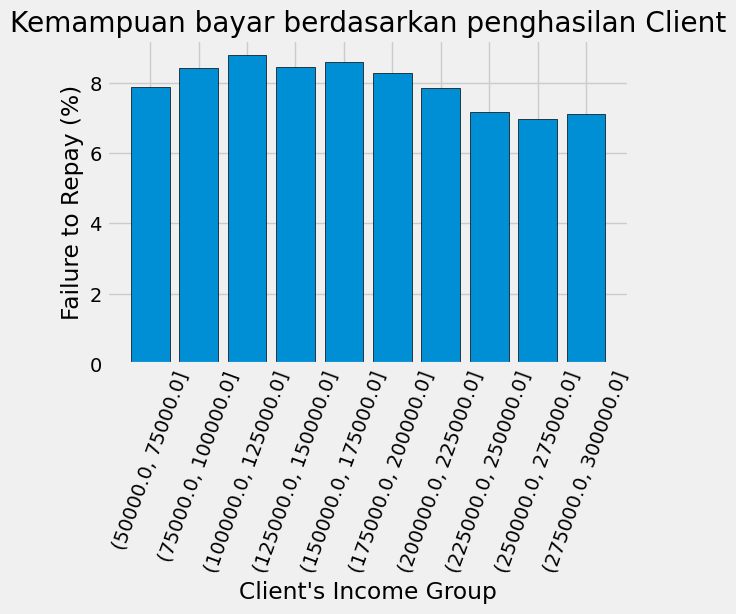

In [49]:
plt.figure(figsize=(6,4))
plt.bar(cl_inc_grp.index.astype(str), 100 * cl_inc_grp['TARGET'],  edgecolor='k')

#mengatur nama label & title & visual
plt.xticks(rotation = 70)
plt.xlabel("Client's Income Group")
plt.ylabel('Failure to Repay (%)')
plt.title("Kemampuan bayar berdasarkan penghasilan Client")
plt.show()

In [50]:
#Melihat korelasi antara variable"
ext_src = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH' ]]
ext_src_corr = ext_src.corr()
ext_src_corr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


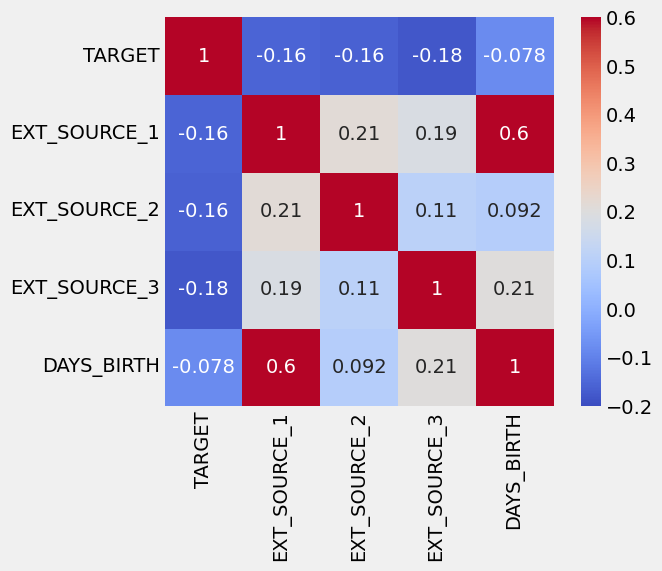

In [51]:
#Membuat dan mengatur plot sebagai heatmap
sns.heatmap(ext_src_corr, vmin = -0.20, vmax = 0.6, annot=True, cmap='coolwarm', square=True)
plt.show()

In [52]:
"""
Ketiga fitur EXT_SOURCE menunjukkan korelasi negatif terhadap TARGET, menunjukkan bahwa semakin tinggi nilai EXT_SOURCE maka-
semakin tinggi kemungkinan pelunasan pinjaman. Selain itu, DAYS_BIRTH dan EXT_SOURCE_1 menunjukkan korelasi positif, 
menunjukkan bahwa adanya kemungkinan usia menjadi salah satu faktor yang dapat memengaruhi skor tersebut.
"""

'\nKetiga fitur EXT_SOURCE menunjukkan korelasi negatif terhadap TARGET, menunjukkan bahwa semakin tinggi nilai EXT_SOURCE maka-\nsemakin tinggi kemungkinan pelunasan pinjaman. Selain itu, DAYS_BIRTH dan EXT_SOURCE_1 menunjukkan korelasi positif, \nmenunjukkan bahwa adanya kemungkinan usia menjadi salah satu faktor yang dapat memengaruhi skor tersebut.\n'

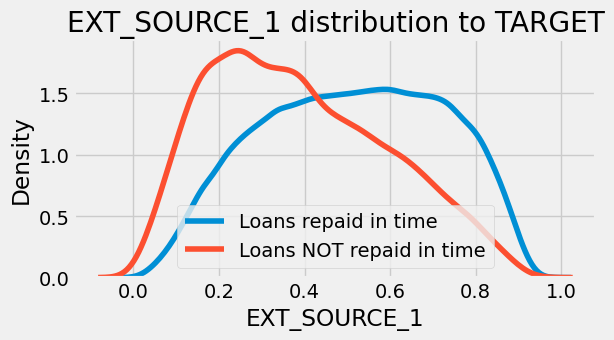

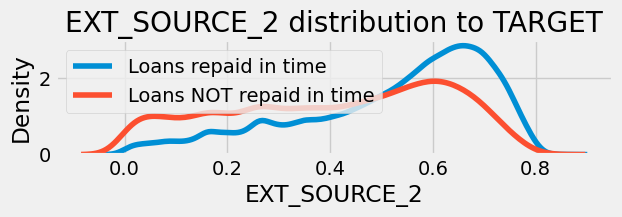

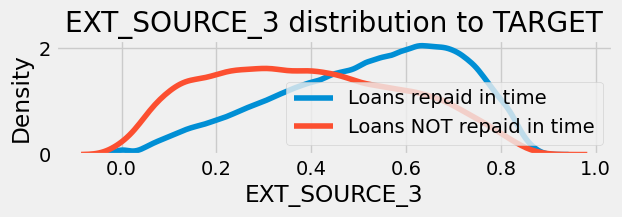

In [53]:
#Setiap instance dari EXT_source(1,2,3) memiliki relasi negatif dengan TARGET, hal ini menyatakan bahwa-
#setiap kali values dari EXT_source meningkat, maka kemungkinan client dapat membayar tepat waktu juga akan meningkat
#serta DAYS_BIRTH memiliki relasi positif dengan EXT_source, hal ini dapat menandakan bahwa-
#salah satu faktor dalam yang meningkatkan values EXT_source dapat berasal dari umur client

#Membuat list EXT_source
ext_sourceall = df_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

#Mengatur ukuran plot
plt.figure(figsize=(6,10))

#Membuat plot kde
for i,source in enumerate(ext_sourceall):
    plt.subplot(3, 1, i+1)
    
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label='Loans repaid in time')
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label='Loans NOT repaid in time')
    
    plt.xlabel(source)
    plt.title('%s distribution to TARGET' %source)
    plt.legend()
    
    #i +=1
    
    plt.show()

In [54]:
"""
EXT_SOURCE_3 & EXT_SOURCE 1 menunjukkan adanya perbedaan antara nilai-nilai target. Meskipun hubungan tidak kuat, dapat terlihat bahwa-
fitur ini berkaitan dengan kemungkinan seseorang untuk membayar kembali pinjaman.EXT_SOURCE 2 juga memiliki hubungan yang sedang-
terhadap kemampuan bayar pinjaman.
"""

'\nEXT_SOURCE_3 menunjukkan adanya perbedaan antara nilai-nilai target. Meskipun hubungan tidak kuat, dapat terlihat bahwa-\nfitur ini berkaitan dengan kemungkinan seseorang untuk membayar kembali pinjaman.\n'

In [55]:
"""
Logistic Regression
"""

'\nLogistic Regression\n'

In [56]:
#Menetapkan X & Y
X = df_train.drop(columns='TARGET', axis=1)
Y = df_train['TARGET']
features_names = list(X.columns)

In [57]:
#Splitting variabel X dan Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=0)

train_data = pd.concat([X_train, Y_train], axis=1)

#Memisahkan client yang tepat waktu dan tidak
onTime = train_data[train_data['TARGET'] == 0]
not_onTime = train_data[train_data['TARGET'] == 1]

#Menyamakan jumlah client yang tepat waktu dengan banyaknya client yang tidak tepat waktu
onTime_undersampling = resample(onTime, replace=False, n_samples=len(not_onTime), random_state=0)

undersampled_data = pd.concat([onTime_undersampling, not_onTime])

#Menerapkan nilai baru X & Y train
X_train_undersampled = undersampled_data.drop(columns='TARGET', axis=1)
Y_train_undersampled = undersampled_data['TARGET']

#Mengatasi missing values dengan imputer menggunakan nilai median setiap kolom
imputer = SimpleImputer(strategy='median')

#fit menggunakan X train yang sudah melalui undersample
imputer.fit(X_train_undersampled)

#Mengatasi missing values dalam X_train_undersampled
X_train_undersampled = imputer.transform(X_train_undersampled)

#Terapkan hal yang sama kepada X_test
X_test = imputer.transform(X_test)

#Melakukan normalisasi
scaler = MinMaxScaler()

#fit menggunakan X train yang sudah melalui undersample & imputer
scaler.fit(X_train_undersampled)

X_trainD_undersampled_scaled = scaler.transform(X_train_undersampled)

#Terapkan hal yang sama kepada X_test
X_testD_scaled = scaler.transform(X_test)

#print(X.shape, X_train.shape, X_test.shape, X_trainD_scaled.shape, X_testD_scaled.shape)

In [58]:
print(X_train.shape, X_train_undersampled.shape, Y_train_undersampled.shape)
print(onTime.shape, not_onTime.shape)

(246008, 242) (39720, 242) (39720,)
(226148, 243) (19860, 243)


In [59]:
#Membuat dictionary jarak nilai parameter C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#Membuat LogisticRegression
model = LogisticRegression()

#Melakukan gridsearch
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_trainD_undersampled_scaled, Y_train_undersampled)

#Assign value terbaik C
best_C = grid_search.best_params_['C']

#Membuat model baru dengan param C
new_model = LogisticRegression(C=best_C)

#Latih model
new_model.fit(X_trainD_undersampled_scaled, Y_train_undersampled)

#Prediksi model
Y_test_pred = new_model.predict(X_testD_scaled)

#Evaluasi akurasi model dengan set test
testD_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f'df_train Test accuracy: {testD_accuracy:.4f}')

df_train Test accuracy: 0.6905


In [60]:
#Evaluasi akurasi model dengan set train
Y_train_pred = new_model.predict(X_trainD_undersampled_scaled)
trainD_accuracy = accuracy_score(Y_train_undersampled, Y_train_pred)
print(f'df_train Training accuracy: {trainD_accuracy:.4F}')

df_train Training accuracy: 0.6798


In [61]:
#Membuat detail probability prediksi model
prediction_probs = new_model.predict_proba(X_testD_scaled)
print(f'df_train prediction probability:\n{prediction_probs}')

df_train prediction probability:
[[0.680798   0.319202  ]
 [0.68816985 0.31183015]
 [0.30941581 0.69058419]
 ...
 [0.56948211 0.43051789]
 [0.49390374 0.50609626]
 [0.52910149 0.47089851]]


In [62]:
#Evaluasi confusion matrix model
threshold=0.7
prediction_probs_thres = (new_model.predict_proba(X_testD_scaled)[:, 1]>threshold).astype(int)
print(f'df_train confusion matrix:\n{confusion_matrix(Y_test, prediction_probs_thres)}')

df_train confusion matrix:
[[51778  4760]
 [ 3316  1649]]


In [63]:
#membuat data sebagai dataframe
pred_probs = pd.DataFrame(prediction_probs, columns=['Probability Good', 'Probability Bad'])
pred_model = pd.DataFrame(Y_test_pred, columns=['Predicted TARGET'])
act_outcome = pd.DataFrame(Y_test.values, columns=['Actual Outcome'])

#Menyatukan dataframe
df_res = pd.concat([act_outcome, pred_probs, pred_model], axis=1)

print(df_res.head())

#Export df_res sebagai file .csv
df_res.to_csv('D:\Dataset\HCI_Final_Project\FInal_final\Logistic_reg_result_final.csv', index=False, sep=',',  encoding='UTF-8')

   Actual Outcome  Probability Good  Probability Bad  Predicted TARGET
0               0          0.680798         0.319202                 0
1               0          0.688170         0.311830                 0
2               0          0.309416         0.690584                 1
3               0          0.420104         0.579896                 1
4               0          0.491979         0.508021                 1


In [64]:
#Prediksi yang dilakukan sebelumnya menggunakan dataset application_train yang digunakan untuk melatih model
#Sehingga untuk mengetahui performa model terhadap data asing, maka model perlu menggunakan dataset application_test
#assign df_test sebagai X_test
X_test = df_test
Y_test_undersampled = resample(Y_test, replace=False, n_samples=len(X_test), random_state=0)

#Mengatasi missing columns and assign value kepada kolom tersebut
#Mengatur setiap kolom X_train yang tidak ada dalam X_test, maka dibuat & dimasukan value
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

#Preprocessing dan normalisasi
imputer.fit(X_train_undersampled)
X_test = imputer.transform(X_test)
X_new_test_scaled = scaler.transform(X_test)

#Membuat prediksi
Y_testdf_pred = new_model.predict(X_new_test_scaled)

In [65]:
#Evaluasi akurasi model dengan set df_test
real_test_acc = accuracy_score(Y_test_undersampled, Y_testdf_pred)
print(f'df_test Logreg accuracy: {real_test_acc :.4F}')

df_test Logreg accuracy: 0.6607


In [66]:
#Membuat prediksi probability
test_prediction_probs = new_model.predict_proba(X_new_test_scaled)
print(prediction_probs)

[[0.680798   0.319202  ]
 [0.68816985 0.31183015]
 [0.30941581 0.69058419]
 ...
 [0.56948211 0.43051789]
 [0.49390374 0.50609626]
 [0.52910149 0.47089851]]


In [67]:
print(X_test.shape, Y_test_undersampled.shape, Y_test.shape)

(48744, 242) (48744,) (61503,)


In [88]:
#Evaluasi confusion matrix model
threshold=0.8
test_prediction_probs_thres = (new_model.predict_proba(X_new_test_scaled)[:, 1]>threshold).astype(int)
testdf_conf_mat = confusion_matrix(Y_test_undersampled, test_prediction_probs_thres)
print(testdf_conf_mat)

[[43435  1392]
 [ 3793   124]]


In [69]:
#membuat data sebagai dataframe
pred_test_probs = pd.DataFrame(test_prediction_probs, columns=['Probability Good', 'Probability Bad'])
pred_model_test = pd.DataFrame(Y_testdf_pred, columns=['Predicted TARGET RD'])
test_act_outcome = pd.DataFrame(Y_test_undersampled.values, columns=['Actual outcome'])

#Menyatukan 3 dataframe
df_test_with_predictions = pd.concat([test_act_outcome, pred_test_probs, pred_model_test], axis=1)

#Memastikan concat benar
print(df_test_with_predictions.head())

#Export df_test_with_predictions sebagai file .csv
df_test_with_predictions.to_csv('D:\Dataset\HCI_Final_Project\FInal_final\Logistic_reg_result_dataTest_final4.csv', index=False, sep=',',  encoding='UTF-8')

   Actual outcome  Probability Good  Probability Bad  Predicted TARGET RD
0               0          0.724758         0.275242                    0
1               0          0.479288         0.520712                    1
2               1          0.754104         0.245896                    0
3               1          0.808545         0.191455                    0
4               0          0.582793         0.417207                    0


In [70]:
print(df_test_with_predictions.shape)

(48744, 4)


In [71]:
"""
RANDOM FOREST
"""

'\nRANDOM FOREST\n'

In [72]:
#Membuat model RandomForest
rand_forest = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0, class_weight='balanced')


In [73]:
print(Y_train_undersampled.shape, X_train_undersampled.shape)

(39720,) (39720, 242)


In [74]:
#fit model
rand_forest.fit(X_train_undersampled, Y_train_undersampled)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

In [75]:
#Mendapatkan feature importances
feature_importances_values = rand_forest.feature_importances_

#Membuat dataframe
feature_df = pd.DataFrame({'feature' : features_names, 'importance' : feature_importances_values})

#Prediksi dengan model RandomForest
rand_pred = rand_forest.predict(X_new_test_scaled)

In [76]:
#Membuat probabilitas prediksi
rand_forest_probs = rand_forest.predict_proba(X_new_test_scaled)
print(f'Random forest predictions probabiltiy:\n{rand_forest_probs}')

Random forest predictions probabiltiy:
[[0.48 0.52]
 [0.5  0.5 ]
 [0.47 0.53]
 ...
 [0.6  0.4 ]
 [0.46 0.54]
 [0.46 0.54]]


In [77]:
#membuat data sebagai dataframe
rand_pred_probs = pd.DataFrame(rand_forest_probs, columns=['Probability Good', 'Probability Bad'])
rand_forest_predictions = pd.DataFrame(rand_pred, columns=['Prdicted Target'])
rand_actual_outcome = pd.DataFrame(Y_test.values, columns=['Actual outcome'])

#Menyatukan dataframe
rf_res = pd.concat([rand_actual_outcome, rand_pred_probs, rand_forest_predictions], axis=1)

#Export rf_res sebagai file .csv
rf_res.to_csv('D:\Dataset\HCI_Final_Project\FInal_final/random_forest_result_final.csv', index=False, encoding='UTF-8')

In [83]:
#Evaluasi akurasi model dengan set test
rand_forest_accuracy = accuracy_score(Y_test_undersampled, rand_pred)
print(f'Random Forest accuracy: {rand_forest_accuracy:.4F}')

Random Forest accuracy: 0.6784


In [79]:
#Evaluasi confusion matrix model
threshold_randf=0.6
rand_forest_probs_thres = (rand_forest.predict_proba(X_new_test_scaled)[:,1]>threshold_randf).astype(int)
print(confusion_matrix(Y_test_undersampled, rand_forest_probs_thres))

[[44462   365]
 [ 3885    32]]


In [80]:
#Diketahui bahwa EXT_source merupakan salah satu feature yang dapat mempengaruhi keputusan TARGET
#Dikethaui bahwa Days_employed & Days_birth merupakan salah satu yang dapat mempengaruhi keputusan TARGT
#Sehingga perlu membuat plot untuk mengetahui kebenaran pernyataan" tersebut
#Membuat fungsi untuk menampilkan feature importance
def feature_impt(df_feats_imp):

    #sorting secara ascending pada 'importance'
    df_feats_imp = df_feats_imp.sort_values('importance', ascending = False).reset_index()
    
    df_feats_imp['importance_normalized'] = df_feats_imp['importance'] / df_feats_imp['importance'].sum()

    #Menentukan & mengatur barchart
    plt.figure(figsize = (10, 6))
    axis_up = plt.subplot()
    axis_up.barh(list(reversed(list(df_feats_imp.index[:20]))), df_feats_imp['importance_normalized'].head(20), edgecolor = 'k', align = 'center')
    
    #set axis Y 15 features teratas beserta nama
    axis_up.set_yticks(list(reversed(list(df_feats_imp.index[:20]))))
    axis_up.set_yticklabels(df_feats_imp['feature'].head(20))
    
    #Memberi label nama axis X  dan title
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()
    
    return df_feats_imp

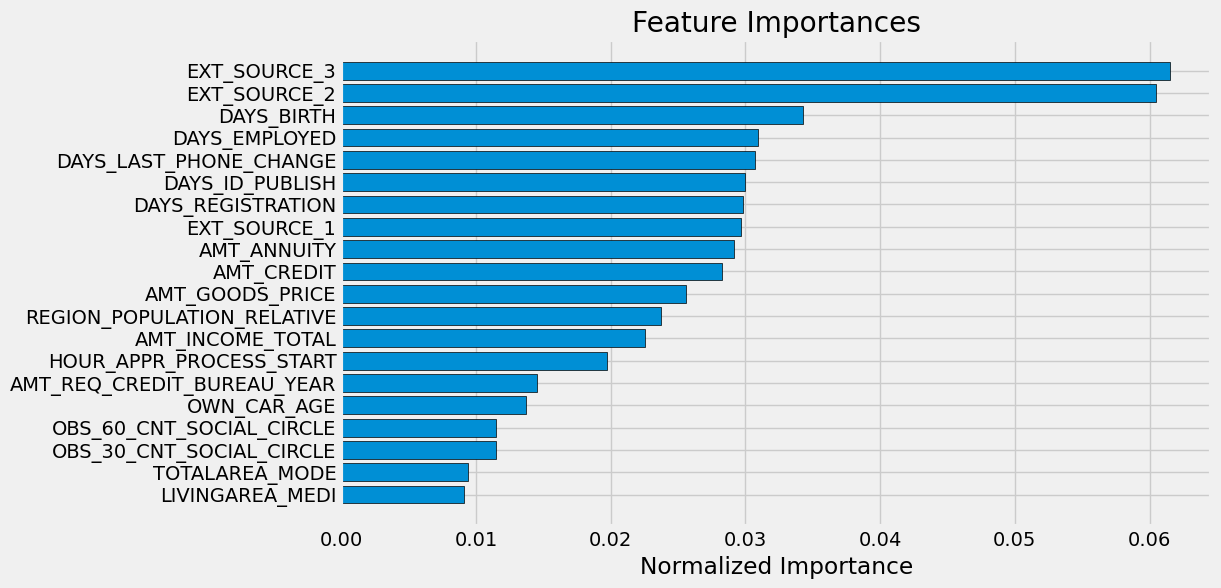

In [81]:
#Memanggil fungsi plot_feature_importances()
feature_importances_sorted = feature_impt(feature_df)

In [82]:
"""
Sesuai pada tahap EDA, EXT_source, DAYS_BIRTH memiliki kemungkinan menjadi feature yang paling penting dalam model.
"""

'\nSesuai pada tahap EDA, EXT_source, DAYS_BIRTH memiliki kemungkinan menjadi feature yang paling penting dalam model.\n'